# **Case Study Think Tank**

**Masoumeh Shariat**

**Model 1: Customer Segmentation** 

All customers have different needs. With increasing customers and orders, understanding each customer's needs is not easy. Identifying potential customers can improve the marketing campaign, which ultimately increases sales. Segmentation can play a better role in grouping those customers into different segments.

In this notebook, RFM analysis is used for Customer Segmentation

**Customer Segmentation using RFM analysis**

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. 

**Recency (R)**: Who have purchased recently? Number of days since last purchase (least recency)

**Frequency (F):** Who has purchased frequently? It means the total number of purchases. ( high frequency)

**Monetary Value(M):** Who have high purchase amount? It means the total money customer spent (high monetary value)


In [192]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

from google.colab import drive  
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Loading Dataset**

In [193]:
dataset=pd.read_csv('/content/gdrive/My Drive/BMW_Task/dataset.csv') 

In [194]:
dataset.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,product_name,department
0,0,10,24,1,1,135442,4,6,8,8.0,4,fresh fruits,produce
1,1,10,24,4,1,135442,4,6,8,8.0,4,fresh fruits,produce
2,2,10,24,7,1,135442,4,6,8,8.0,4,fresh fruits,produce
3,3,28,24,4,1,98256,29,3,13,6.0,4,fresh fruits,produce
4,4,28,24,6,1,98256,29,3,13,6.0,4,fresh fruits,produce


**Calculate Recency Frequency and Monetary**


**Recency**: Calculate the number of days between present date and date of last purchase each customer.

In [195]:
df_recency = dataset.groupby(by='user_id',as_index=False)["days_since_prior_order"].min()
df_recency.columns = ['user_id','recency']
df_recency.head()

,user_id,recency
0,2,3.0
1,3,9.0
2,7,30.0
3,10,14.0
4,11,30.0


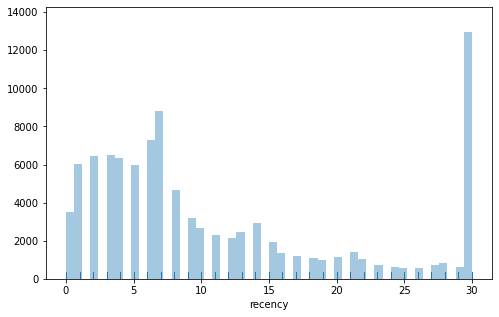

In [196]:
plt.figure(figsize=(8,5))
sns.distplot(df_recency.recency,kde=False,rug=True)

**Frequency**:Calculate the number of orders for each customer.

In [197]:
df_frequency = dataset.groupby(by='user_id',as_index=False)["order_id"].count()
df_frequency.columns = ['user_id','frequency']
df_frequency.head()

,user_id,frequency
0,2,11
1,3,19
2,7,24
3,10,30
4,11,11


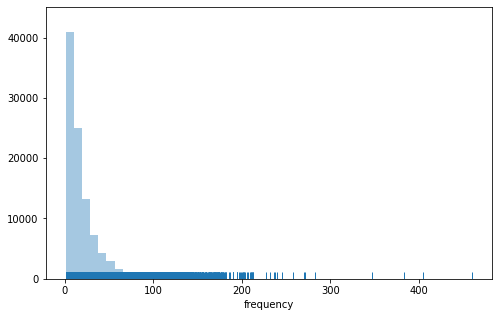

In [198]:
plt.figure(figsize=(8,5))
sns.distplot(df_frequency.frequency,kde=False,rug=True)


**Monetary:** Calculate sum of order number by each customer.

In [199]:
df_monetary = dataset.groupby(by='user_id',as_index=False)['order_number'].sum()
df_monetary.columns = ['user_id','monetary']
df_monetary.head()

,user_id,monetary
0,2,27
1,3,93
2,7,72
3,10,120
4,11,55


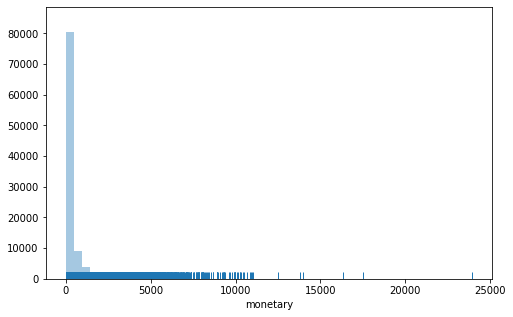

In [200]:
plt.figure(figsize=(8,5))
sns.distplot(df_monetary.monetary,kde=False,rug=True)

**Join tables**: recency , frequency and monetary

In [201]:
rfm=pd.merge(pd.merge(df_recency,df_frequency,on="user_id"),df_monetary,on="user_id")
rfm.head()

,user_id,recency,frequency,monetary
0,2,3.0,11,27
1,3,9.0,19,93
2,7,30.0,24,72
3,10,14.0,30,120
4,11,30.0,11,55


**Computing Quantile of RFM values**

Customers with the lowest recency, highest frequency and highest monetary are considered as top customers.

In [202]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 3, ['1','2','3'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 3, ['3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 3, ['3','2','1'])
rfm.head()

,user_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,2,3.0,11,27,1,2,3
1,3,9.0,19,93,2,2,2
2,7,30.0,24,72,3,1,2
3,10,14.0,30,120,3,1,2
4,11,30.0,11,55,3,2,2


# **RFM Result Interpretation**
Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [203]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,user_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,2,3.0,11,27,1,2,3,123
1,3,9.0,19,93,2,2,2,222
2,7,30.0,24,72,3,1,2,312
3,10,14.0,30,120,3,1,2,312
4,11,30.0,11,55,3,2,2,322


In [204]:
# Filter out Top/Best cusotmers
best_costumer=rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False)
best_costumer.reset_index().head()

,index,user_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,84471,176478,0.0,460,23906,1,1,1,111
1,96535,201268,0.0,347,17492,1,1,1,111
2,62304,129928,4.0,405,16339,1,1,1,111
3,16120,33731,0.0,212,13966,1,1,1,111
4,60562,126305,2.0,384,13790,1,1,1,111


In [205]:
segment = [0]*len(rfm)
for i in range(0,len(rfm)):
    if rfm['RFM_Score'][i]=='111':
        segment[i]='Best Customers'
    elif rfm['RFM_Score'][i]==('121'or'131'):
        segment[i]='Loyal Customers'
    elif rfm['RFM_Score'][i]==('221'or '321' or '211'or '231'or'331'):
        segment[i]='Big Spender'
    elif rfm['RFM_Score'][i]=='333':
        segment[i]='Lost Customers'
    elif rfm['RFM_Score'][i]=='311':
        segment[i]='Almost Lost'
    else:
        segment[i]='Others'

In [206]:
rfm["segment"]=segment
rfm.head()

,user_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,segment
0,2,3.0,11,27,1,2,3,123,Others
1,3,9.0,19,93,2,2,2,222,Others
2,7,30.0,24,72,3,1,2,312,Others
3,10,14.0,30,120,3,1,2,312,Others
4,11,30.0,11,55,3,2,2,322,Others


<Figure size 864x576 with 0 Axes>

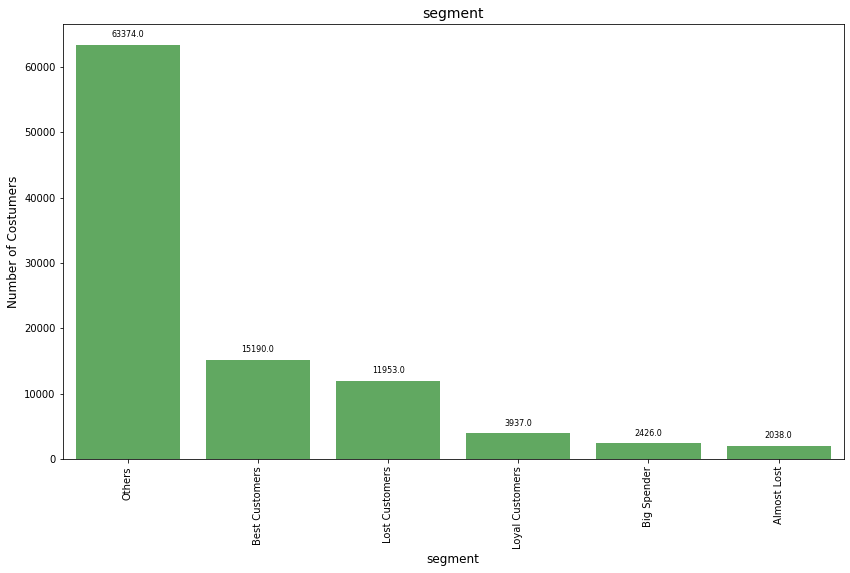

In [207]:
rfm_plot= rfm.groupby(by='segment',as_index=False)["user_id"].count()

plt.figure(figsize=(12,8))
# splot=sns.barplot(rfm_plot["segment"], rfm_plot["user_id"],
#             alpha=0.6, color=color[1])
plt.figure(figsize=(14,8))
splot=sns.barplot(rfm_plot["segment"], rfm_plot["user_id"],
            order=rfm_plot.sort_values(by="user_id", ascending=False).segment, 
            alpha=0.8,linewidth=0.8, color=color[2])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points',size=8)

plt.title('segment',size=14)
plt.xlabel('segment',size=12)
plt.ylabel('Number of Costumers',size=12)
plt.xticks(rotation='vertical')
plt.show()

In [208]:
encode_column ={'Best Customers':1,'Loyal Customers':2,'Big Spender':3,
                             'Others':4,'Lost Customers':5,'Almost Lost':6}
rfm["segment_number"]=rfm.segment.map(encode_column)

In [209]:
rfm.head()

,user_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,segment,segment_number
0,2,3.0,11,27,1,2,3,123,Others,4
1,3,9.0,19,93,2,2,2,222,Others,4
2,7,30.0,24,72,3,1,2,312,Others,4
3,10,14.0,30,120,3,1,2,312,Others,4
4,11,30.0,11,55,3,2,2,322,Others,4


# **Model 2: K-means clustering**
 
 Clustering costumers with K-means model based on RFM 

In [210]:
rfm2 = rfm[["user_id",	"recency",	"frequency"	,"monetary"]]
rfm_quantiles = rfm2.iloc[:, 1:].quantile(q = [0.25, 0.5, 0.75]).to_dict()
rfm_quantiles


{'frequency': {0.25: 7.0, 0.5: 13.0, 0.75: 24.0},
 'monetary': {0.25: 38.0, 0.5: 108.0, 0.75: 330.0},
 'recency': {0.25: 4.0, 0.5: 7.0, 0.75: 16.0}}

In [211]:
rfm2.head()

,user_id,recency,frequency,monetary
0,2,3.0,11,27
1,3,9.0,19,93
2,7,30.0,24,72
3,10,14.0,30,120
4,11,30.0,11,55


**Recency Score**: the lower the recency, the higher the score 

**Frequently and  Monetary Scores:**  the higher the quantile value, the higher the score 

In [212]:
def Min_Score(i, col, df):
    if i <= df[col][0.25]:
        return 4
    elif i <= df[col][0.50]:
        return 3
    elif i <= df[col][0.75]: 
        return 2
    else:
        return 1
    
def Max_Score(i, col, df):
    if i <= df[col][0.25]:
        return 1
    elif i <= df[col][0.50]:
        return 2
    elif i <= df[col][0.75]: 
        return 3    
    else:
        return 4


In [213]:
rfm2['r_score'] = rfm2['recency'].apply(Min_Score, args=('recency', rfm_quantiles ))
rfm2['f_score'] = rfm2['frequency'].apply(Max_Score, args=('frequency', rfm_quantiles ))
rfm2['m_score'] = rfm2['monetary'].apply(Max_Score, args=('monetary', rfm_quantiles ))

rfm2 = rfm2[['user_id', 'r_score', 'f_score', 'm_score',]]
rfm2.head()

,user_id,r_score,f_score,m_score
0,2,4,2,1
1,3,2,3,2
2,7,1,3,2
3,10,2,4,3
4,11,1,2,2


In [214]:
rfm2['Total_Score'] = rfm2['r_score'] + rfm2['f_score'] + rfm2['m_score']
rfm2 = rfm2[['user_id', 'Total_Score']]
rfm2.head()

,user_id,Total_Score
0,2,7
1,3,7
2,7,6
3,10,9
4,11,5


In [221]:
#fit clustering
kmeans = KMeans(n_clusters=4,init='random',random_state=None)
clusters = kmeans.fit_predict(rfm2)
rfm2['Clusters'] = clusters
rfm2.head()

,user_id,Total_Score,Clusters
0,2,7,2
1,3,7,2
2,7,6,2
3,10,9,2
4,11,5,2


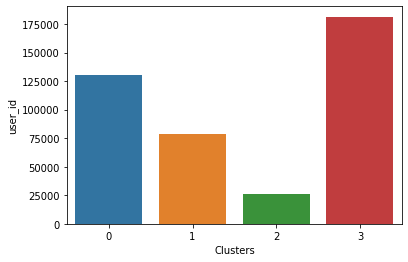

In [222]:
sns.barplot(rfm2["Clusters"],rfm2["user_id"])

## Recommend product to user based on number of order from it

In [217]:
def recommend_product(df, product):
    recommendations = df.corrwith(df[product])
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations

In [218]:
df_basket=dataset[["order_id","order_number","product_name"]]
df_basket=df_basket.drop_duplicates()
df_basket.head()

,order_id,order_number,product_name
0,10,4,fresh fruits
3,28,29,fresh fruits
7,56,8,fresh fruits
8,62,4,fresh fruits
10,172,17,fresh fruits


In [219]:
df_basket = df_basket.pivot_table(index='order_id', columns=['product_name'], values='order_number').fillna(0)
df_basket.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
recommendations = recommend_product(df_basket, 'fresh fruits').reset_index()
recommendations.head()

,index,product_name,correlation
0,50,fresh fruits,1.000000
1,53,fresh vegetables,0.515340
2,98,packaged vegetables fruits,0.488832
3,133,yogurt,0.374179
4,83,milk,0.358984


**Conlusion:**
In this notebook, RFM model and K-means clustering are used for clustering datasets. In the end, a small recommendation model is introduced that takes the name of the product and gives some recommendations to us for ordering some new products that are close to the last product.

**Based on the RFM rating, we can make some recommendations to customers.**

**Best customers:** Special discounts can be considered for this category. They can also be the first group to be introduced to new products. To keep them for ourselves.

**Big Sponsors:** This group can also be discounted to make more purchases.

**Loyal customers:** Create loyalty cards that can earn points each time you buy, and these points can be turned into a discount.

**Lost and almost lost customers:** Send them emails, personal messages, notifications to encourage them to order.
